<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [3]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [4]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\3697779589.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [5]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [6]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [7]:
energia.dtypes

referencia     datetime64[ns]
residencial             int64
industrial              int64
comercial               int64
dtype: object

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\1351629390.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="1", palette="pastel")
C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\1351629390.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='comercial', marker="1", palette="pastel")
C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\1351629390.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=energia, x='referencia', y='industrial', marker="1", palette="pastel")


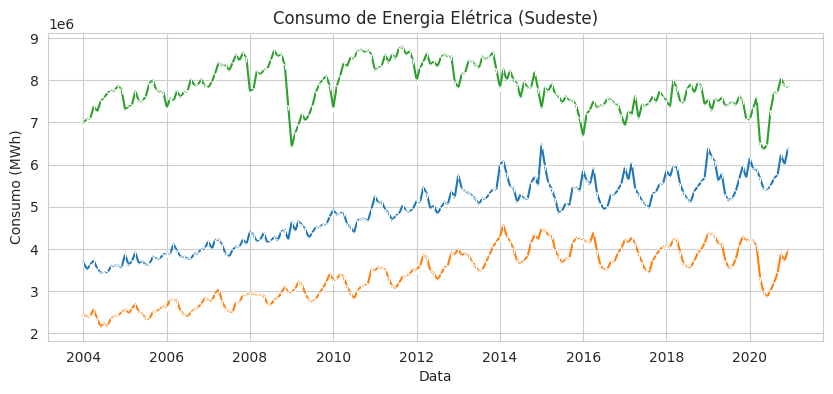

In [8]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=energia, x='referencia', y='comercial', marker="1", palette="pastel")
  grafico = sns.lineplot(data=energia, x='referencia', y='industrial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(10, 4)

In [12]:

# Converção todas as colunas de kWh para MWh
colunas_kWh = ['residencial', 'industrial', 'comercial']  # Nome das colunas
for coluna in colunas_kWh:
    energia[coluna] = energia[coluna] / 1000.0  # Converte de kWh para MWh

# Salvar o DataFrame atualizado de volta para um arquivo CSV
energia.to_csv('Energia.csv', index=False)

Responda:

 - Qual é a granularidade da base de dados: **?**
 - Qual é o intervalo de tempo (min/max): **?**

In [13]:
energia.describe()

,referencia,residencial,industrial,comercial
count,204,204.000000,204.000000,204.000000
mean,2012-06-16 02:21:10.588235264,4888.914691,7831.989289,3394.783549
min,2004-01-01 00:00:00,3433.443000,6357.406000,2159.479000
25%,2008-03-24 06:00:00,4223.299500,7471.518750,2844.077000
50%,2012-06-16 00:00:00,5034.972000,7792.825000,3483.454000
75%,2016-09-08 12:00:00,5437.622000,8278.358500,3905.668750
max,2020-12-01 00:00:00,6476.567000,8795.554000,4571.717000
std,NaN,755.112347,521.521947,623.928114


A granularidade é mensal por categoria de consumo (residencial, comercial e industrial) ao longo de um ano. Com relação ao minimo e maximo, podemos ver no codigo acima que já está devidamente convertido para MWh

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [14]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

'wget' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [15]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\1081947969.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [16]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [17]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **?**
 - Qual é o intervalo de tempo (min/max): **?**

In [29]:
temperatura.describe()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
count,901,901.000000,814.000000,894.000000
mean,2019-10-08 00:00:00,19.067703,24.350123,21.626398
min,2018-07-15 00:00:00,8.000000,17.000000,13.000000
25%,2019-02-25 00:00:00,17.000000,22.000000,20.000000
50%,2019-10-08 00:00:00,19.000000,24.000000,22.000000
75%,2020-05-20 00:00:00,21.000000,26.000000,23.000000
max,2020-12-31 00:00:00,29.000000,32.000000,29.000000
std,NaN,3.343463,3.038339,2.571534


## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [34]:
# resposta da questão 2.1.a
data = energia.set_index(keys=['referencia'])

 - **b.** Selecione apenas os dados entre 2019 e 2020.

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\508031847.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data=df_energia, x='referencia', y='residencial', marker="1", palette="pastel")


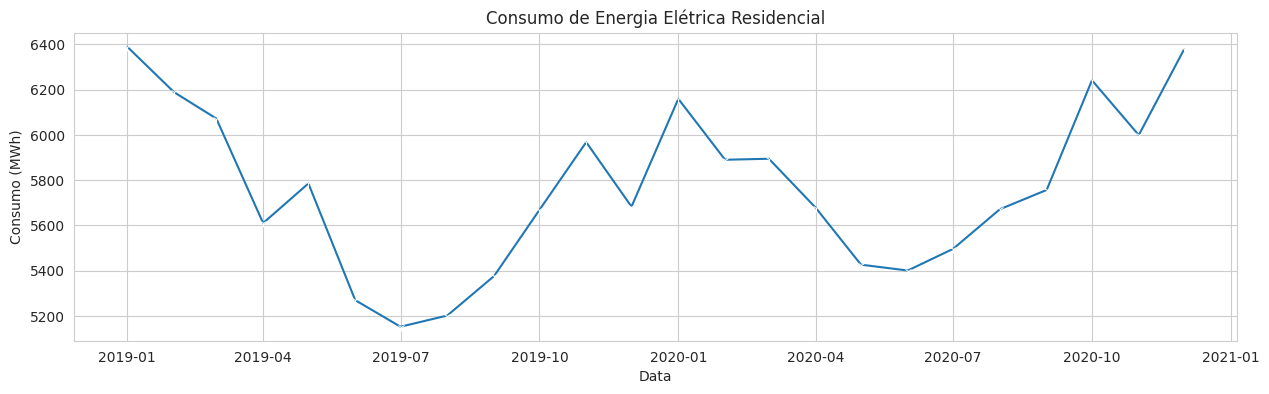

In [35]:
# resposta da questão 2.1.b
df_energia = data['2019':'2020']

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=df_energia, x='referencia', y='residencial', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica Residencial', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [37]:
# resposta da questão 2.2.a
temperatura.set_index('referencia', inplace=True)

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [38]:
# resposta da questão 2.1.b
df_temperatura = temperatura['2019':'2020']

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [39]:
# resposta da questão 2.2.c
df_temperatura.dropna(inplace=True)

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\4020520802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperatura.dropna(inplace=True)


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [43]:
# resposta da questão 2.2.d
df_temperatura['temp_media'] = df_temperatura[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)

C:\Users\Leão Neto\AppData\Local\Temp\ipykernel_21460\1515848237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperatura['temp_media'] = df_temperatura[['temp-media-sp', 'temp-media-rj', 'temp-media-mg']].mean(axis=1)


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [44]:
# resposta da questão 2.2.f
df_temperatura = df_temperatura.resample('M').mean()
print("Shape do dataframe de temperatura após reamostragem:", df_temperatura.shape)

Shape do dataframe de temperatura após reamostragem: (24, 4)


 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

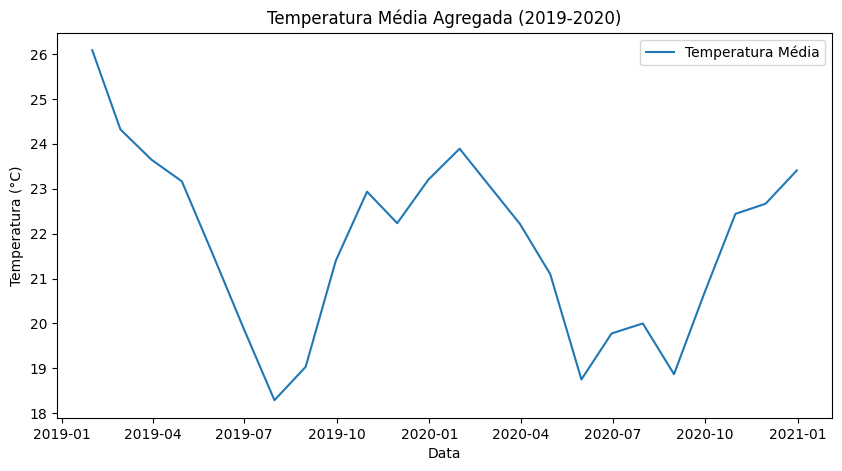

In [45]:
# resposta da questão 3.1.b
plt.figure(figsize=(10, 5))
plt.plot(df_temperatura.index, df_temperatura['temp_media'], label='Temperatura Média')
plt.title('Temperatura Média Agregada (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

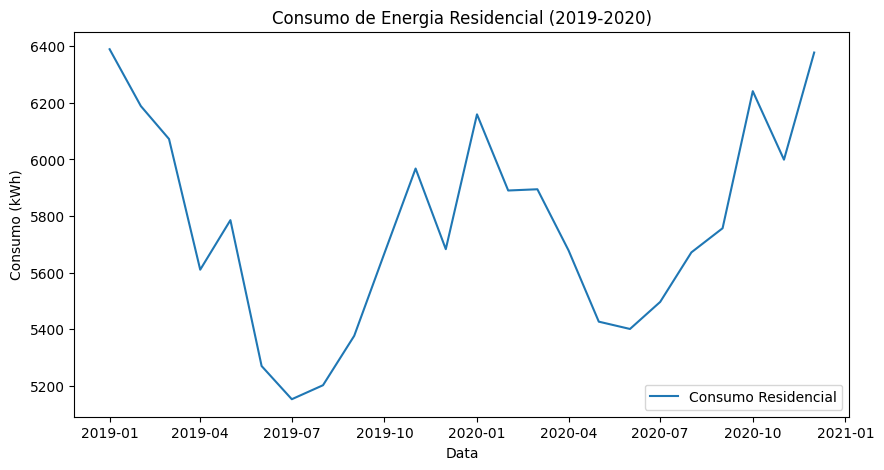

In [46]:
# resposta da questão 3.1.b
plt.figure(figsize=(10, 5))
plt.plot(df_energia.index, df_energia['residencial'], label='Consumo Residencial')
plt.title('Consumo de Energia Residencial (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [48]:
# resposta da questão 3.1.c
coef_pearson = np.corrcoef(df_temperatura['temp_media'], df_energia['residencial'])[0, 1]
print("Coeficiente de Pearson entre consumo residencial e temperatura média:", coef_pearson)


Coeficiente de Pearson entre consumo residencial e temperatura média: 0.824271822739731


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?

Considerando as medidas:
- 1 indica uma correlação positiva perfeita.
- 0 indica nenhuma correlação.
- -1 indica uma correlação negativa perfeita.

Diante do resultado obtido de 0.82, posso dizer que há uma forte relação linear entre as variáveis o que indica uma boa relação de predição

**Resposta:** ?

### **3.2. Consumo comercial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

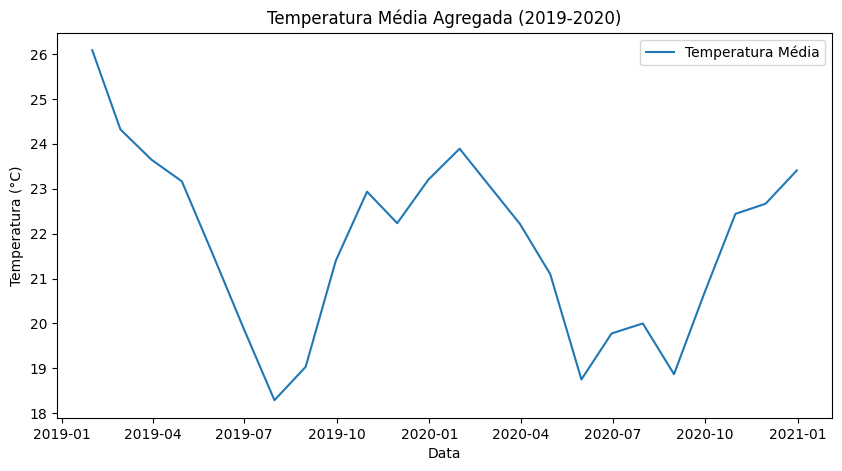

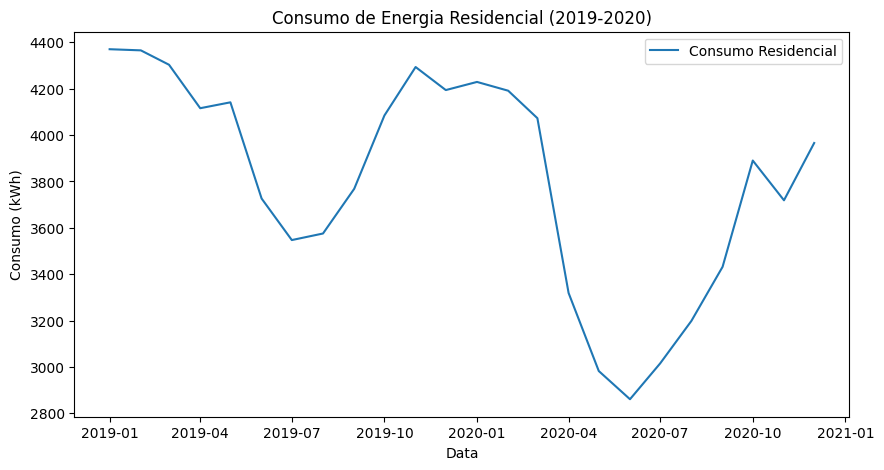

Coeficiente de Pearson entre consumo residencial e temperatura média: 0.8235028939103619


In [49]:
plt.figure(figsize=(10, 5))
plt.plot(df_temperatura.index, df_temperatura['temp_media'], label='Temperatura Média')
plt.title('Temperatura Média Agregada (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Gráfico de linha para a série temporal do consumo de energia comercial
plt.figure(figsize=(10, 5))
plt.plot(df_energia.index, df_energia['comercial'], label='Consumo Residencial')
plt.title('Consumo de Energia Residencial (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

# Calculando o coeficiente de Pearson
coef_pearson = np.corrcoef(df_temperatura['temp_media'], df_energia['comercial'])[0, 1]
print("Coeficiente de Pearson entre consumo residencial e temperatura média:", coef_pearson)


Considerando as medidas:
- 1 indica uma correlação positiva perfeita.
- 0 indica nenhuma correlação.
- -1 indica uma correlação negativa perfeita.

Diante do resultado obtido de 0.82, posso dizer que há uma forte relação linear entre as variáveis o que indica uma boa relação de predição

### **3.3. Consumo industrial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

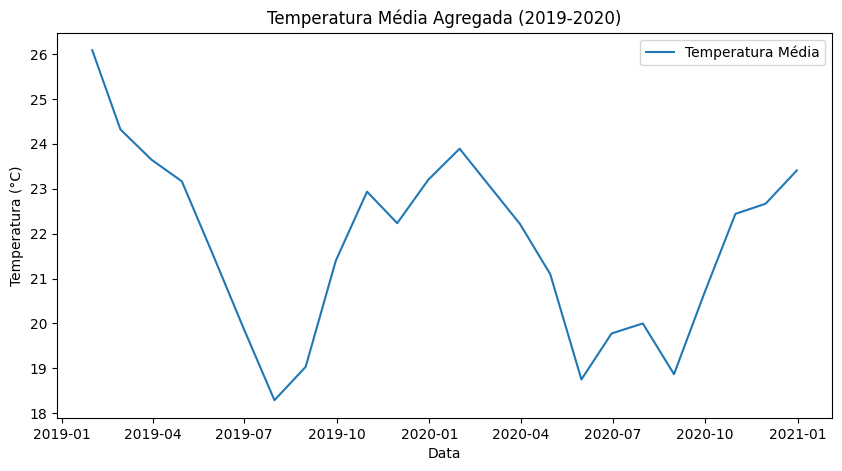

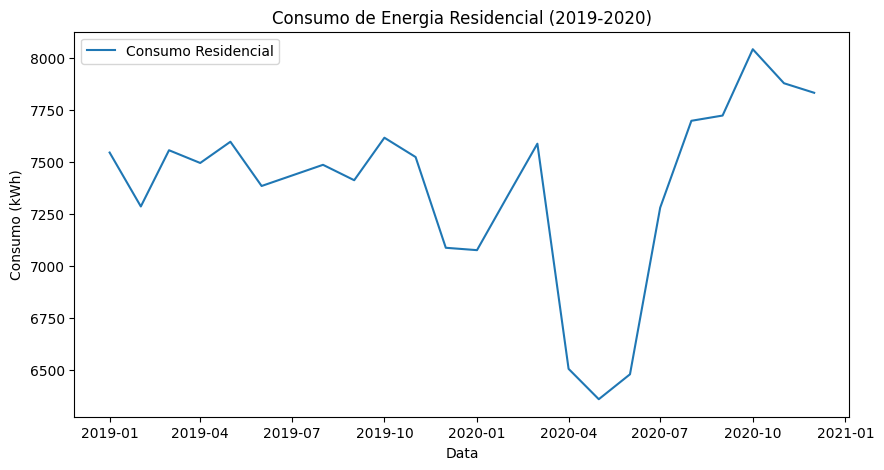

Coeficiente de Pearson entre consumo residencial e temperatura média: 0.2873229670422558


In [50]:
plt.figure(figsize=(10, 5))
plt.plot(df_temperatura.index, df_temperatura['temp_media'], label='Temperatura Média')
plt.title('Temperatura Média Agregada (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

# Gráfico de linha para a série temporal do consumo de energia industrial
plt.figure(figsize=(10, 5))
plt.plot(df_energia.index, df_energia['industrial'], label='Consumo Residencial')
plt.title('Consumo de Energia Residencial (2019-2020)')
plt.xlabel('Data')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.show()

# Calculando o coeficiente de Pearson
coef_pearson = np.corrcoef(df_temperatura['temp_media'], df_energia['industrial'])[0, 1]
print("Coeficiente de Pearson entre consumo residencial e temperatura média:", coef_pearson)


Considerando as medidas:
- 1 indica uma correlação positiva perfeita.
- 0 indica nenhuma correlação.
- -1 indica uma correlação negativa perfeita.

Diante do resultado obtido de 0.28, posso dizer quenão temos uma boa relação, tanto pelo resultado quanto pelo comparativo com as demais

---